<h1 style="color:red;">Week 2</h1>
<p style="font-size:16px;">
    This week we will be looking at the basic plotting of signal vs background scheme using hist.
</p>

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

# Set CMS style for the plots
plt.style.use(hep.style.CMS)


# Step 1: Generating Random Samples for Signal and Background
np.random.seed(42)  # Ensure reproducibility

# Random signal and background distributions
signal = np.random.normal(125, 5, 1000)  # Signal centered at 125 GeV
background = np.random.normal(110, 15, 3000)  # Background centered at 110 GeV




# Generate the random signal data

```python
import numpy as np

mean = 125
std_dev = 5
num_samples = 1000

signal = np.random.normal(mean, std_dev, num_samples)


In [2]:
def plot_sig_bkg(signal, background,x_label, filename):
    # Create histogram bins
    bins = np.linspace(40, 200, 50) #Generates 50 evenly spaced values also known as bin between 40 to 200

    
    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 7)) #This sets up the plotting area with a width of 8 inches and a height of 7 inches

    # Plot the background and signal as a stacked histogram
    ax.hist(background, bins=bins, histtype='step',label='Background',linewidth=3,stacked=True)
    ax.hist(signal, bins=bins, histtype='step', label='Signal', linewidth=3,stacked=True)

    # Add labels and title
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel('Number of Events', fontsize=14)

    # CMS-style text
    ax.text(0.05, 1.02, r'$\mathbf{CMS \ Open \ Data}$', transform=ax.transAxes, fontsize=14)
    ax.text(0.6, 1.02, r'$\sqrt{s} = 8 \ \mathrm{TeV}, L_{int} = 11.6 \ \mathrm{fb}^{-1}$', transform=ax.transAxes, fontsize=12)

    # Add a legend
    ax.legend(loc='upper right', fontsize=14)

    # Save the plot
    plt.savefig(filename)

    # Display the plot
    plt.show()

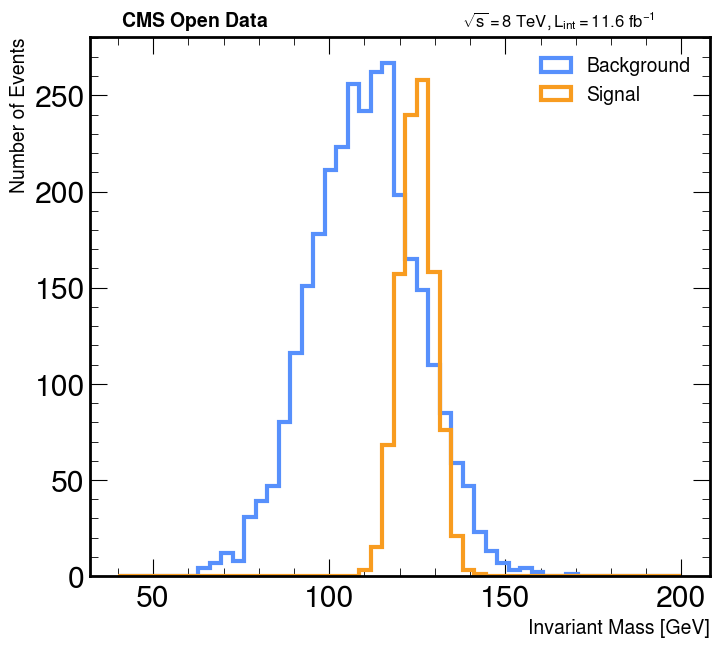

In [3]:
plot_sig_bkg(signal, background, "Invariant Mass [GeV]", "cms_plot_example.png")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

# Open the ROOT file
file_sig = uproot.open('/home/bhanda25/Phys323_fall2024/Root_files/SMHiggsToZZTo4L.root')
file_bkg = uproot.open('/home/bhanda25/Phys323_fall2024/Root_files/ZZTo4e.root')
tree_sig=file_sig['Events;1']
tree_bkg=file_bkg['Events;1']

In [5]:
#Acess the kinematics of the signal file 
electron_pt_sig=tree_sig['Electron_pt'].array()
electron_count_sig=tree_sig['nElectron'].array()

In [6]:
#Acess the kinematics of the background file 
electron_pt_bkg=tree_bkg['Electron_pt'].array()
electron_count_bkg=tree_bkg['nElectron'].array()

In [7]:
#Perform the cuts by introducing the selection function for signal and background

def selection_sig(electron_count_sig,electron_pt_sig):
    elec_count_mask =(electron_count_sig >= 4)
    return electron_pt_sig[elec_count_mask ]

def selection_bkg(electron_count_bkg, electron_pt_bkg):
    elec_count_mask =(electron_count_bkg >= 4)
    return electron_pt_bkg[elec_count_mask]

In [8]:
signal_pt=selection_sig(electron_count_sig,electron_pt_sig)
background_pt=selection_bkg(electron_count_bkg, electron_pt_bkg)


In [9]:
signal_pt

<Array [[38.9, 9.57, 25.9, 53.7], ..., [23.7, ...]] type='5999 * var * float32'>

In [10]:
background_pt


<Array [[23.2, 36.2, 13.6, 38.1], ..., [...]] type='72853 * var * float32'>

<h1 style="color:blue;">In the background and signal plot, we have the information of all 4 electron. It will look messy in the plot so let's just take the first electron for signal and background</h1>

In [11]:
sig=[row[0] for row in signal_pt]
bkg=[row[0] for row in background_pt]

In [12]:
def plot_sig_bkg1(signal, background, x_label):
    # Create histogram bins
    bins = np.linspace(0, 200, 30)  # Generates 50 evenly spaced values between 0 to 200
    
    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 7))  # This sets up the plotting area with a width of 8 inches and a height of 7 inches

    # Plot the background and signal as a stacked histogram
    # Background first, then signal to ensure signal is on top
    ax.hist([background, signal], bins=bins, histtype='stepfilled', label=['Background', 'Signal'], 
            alpha=0.7, stacked=True, linewidth=2)

    # Add labels and title
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel('Number of Events', fontsize=14)

    # CMS-style text
    ax.text(0.05, 1.02, r'$\mathbf{CMS \ Open \ Data}$', transform=ax.transAxes, fontsize=14)
    ax.text(0.6, 1.02, r'$\sqrt{s} = 8 \ \mathrm{TeV}, L_{int} = 11.6 \ \mathrm{fb}^{-1}$', transform=ax.transAxes, fontsize=12)

    # Add a legend
    ax.legend(loc='upper right', fontsize=14)

    # Display the plot
    plt.show()

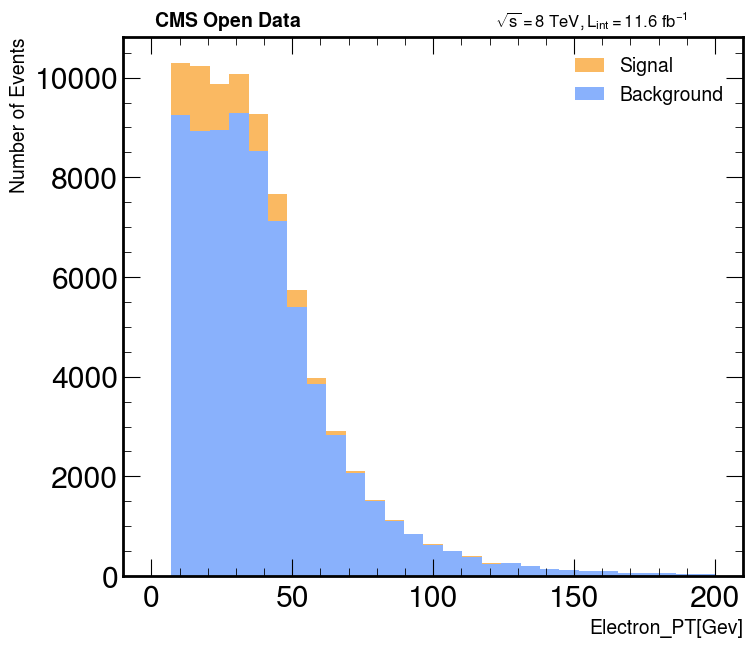

In [13]:
plot_sig_bkg1(sig ,bkg,"Electron_PT[Gev]")

<h1 style="color:red;">As an exercise, please do a plotting for different sets of cuts and different sets of bins </h1>